In [6]:
# !pip install xgboost
# !pip install graphviz
# !python -m pip install plotly
# !pip install --upgrade nbformat
# !pip install mlxtend
# !pip install lime
# !pip install shap

# Importing Libraries

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTETomek
#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
# import shap

In [8]:
#Dataset
proc_data = pd.read_csv("resampled_data.csv")
proc_data.head()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,1,4,2,2,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93,1
1,2,4,2,2,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07,1
2,0,4,4,2,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139.19,1
3,1,4,0,2,11.0,6.0,3.0,4,3,10,13.0,0.0,1.0,0.0,153.81,1
4,2,1,3,2,0.0,11.0,2.0,3,3,2,13.0,2.0,2.0,2.0,134.41,1


# Implementing Models

In [9]:

y = proc_data['Churn']
X = proc_data.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4047, 15), (1735, 15), (4047,), (1735,))

# Scaling

In [10]:

Scaler = MinMaxScaler()
x_train_scaled = Scaler.fit_transform(X_train)
x_test_scaled = Scaler.fit_transform(X_test)

# Implementing Models

In [11]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier(),
    'K Nearest Neighbor':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'AdaBoost Classifier':AdaBoostClassifier(),
    'XG boost':XGBClassifier(),
    'GaussianNB':GaussianNB()
}

Fit models

In [12]:
evaluation_metrics = []

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)

    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    metrics_dict = {
        'Model Name': model_name,
        'Accuracy on train data': accuracy_score(y_train, y_pred_train),
        'Accuracy on test data': accuracy_score(y_test, y_pred_test),
        'Precision on train data': precision_score(y_train, y_pred_train),
        'Precision on test data': precision_score(y_test, y_pred_test),
        'Recall on train data': recall_score(y_train, y_pred_train),
        'Recall on test data': recall_score(y_test, y_pred_test),
        'F1-score on train data': f1_score(y_train, y_pred_train),
        'F1-score on test data': f1_score(y_test, y_pred_test),
        'Confusion Matrix on train data': confusion_matrix(y_train, y_pred_train),
        'Confusion Matrix on test data': confusion_matrix(y_test, y_pred_test)
    }

    evaluation_metrics.append(metrics_dict)

for metrics in evaluation_metrics:
    print(metrics)
    print()

{'Model Name': 'Logistic Regression', 'Accuracy on train data': 0.7793427230046949, 'Accuracy on test data': 0.7769452449567723, 'Precision on train data': 0.7520952801058668, 'Precision on test data': 0.7494669509594882, 'Recall on train data': 0.837426326129666, 'Recall on test data': 0.8222222222222222, 'F1-score on train data': 0.7924703695096446, 'F1-score on test data': 0.7841606246514221, 'Confusion Matrix on train data': array([[1449,  562],
       [ 331, 1705]], dtype=int64), 'Confusion Matrix on test data': array([[645, 235],
       [152, 703]], dtype=int64)}

{'Model Name': 'SVM', 'Accuracy on train data': 0.8796639486039042, 'Accuracy on test data': 0.854178674351585, 'Precision on train data': 0.8627634660421546, 'Precision on test data': 0.8374439461883408, 'Recall on train data': 0.9047151277013753, 'Recall on test data': 0.8736842105263158, 'F1-score on train data': 0.8832414289139295, 'F1-score on test data': 0.8551803091013165, 'Confusion Matrix on train data': array(

In [13]:
Evaluation_df = pd.DataFrame(evaluation_metrics)
Evaluation_df

,Model Name,Accuracy on train data,Accuracy on test data,Precision on train data,Precision on test data,Recall on train data,Recall on test data,F1-score on train data,F1-score on test data,Confusion Matrix on train data,Confusion Matrix on test data
0,Logistic Regression,0.779343,0.776945,0.752095,0.749467,0.837426,0.822222,0.792470,0.784161,"[[1449, 562], [331, 1705]]","[[645, 235], [152, 703]]"
1,SVM,0.879664,0.854179,0.862763,0.837444,0.904715,0.873684,0.883241,0.855180,"[[1718, 293], [194, 1842]]","[[735, 145], [108, 747]]"
2,Random Forest,1.000000,0.967723,1.000000,0.954494,1.000000,0.981287,1.000000,0.967705,"[[2011, 0], [0, 2036]]","[[840, 40], [16, 839]]"
3,K Nearest Neighbor,0.916976,0.865130,0.866064,0.798845,0.987721,0.970760,0.922900,0.876452,"[[1700, 311], [25, 2011]]","[[671, 209], [25, 830]]"
4,Decision Tree,1.000000,0.921037,1.000000,0.887689,1.000000,0.961404,1.000000,0.923077,"[[2011, 0], [0, 2036]]","[[776, 104], [33, 822]]"
5,AdaBoost Classifier,0.885594,0.819597,0.884221,0.764133,0.888998,0.916959,0.886603,0.833599,"[[1774, 237], [226, 1810]]","[[638, 242], [71, 784]]"
6,XG boost,1.000000,0.938329,1.000000,0.899573,1.000000,0.984795,1.000000,0.940257,"[[2011, 0], [0, 2036]]","[[786, 94], [13, 842]]"
7,GaussianNB,0.702743,0.704899,0.680537,0.681098,0.771120,0.754386,0.723003,0.715871,"[[1274, 737], [466, 1570]]","[[578, 302], [210, 645]]"


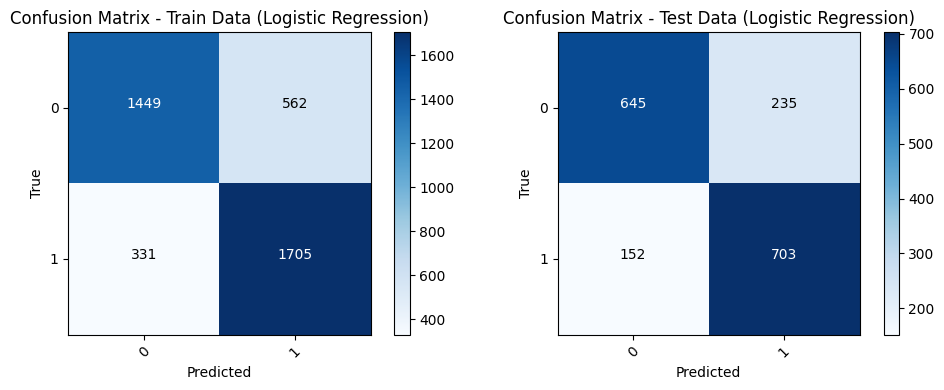

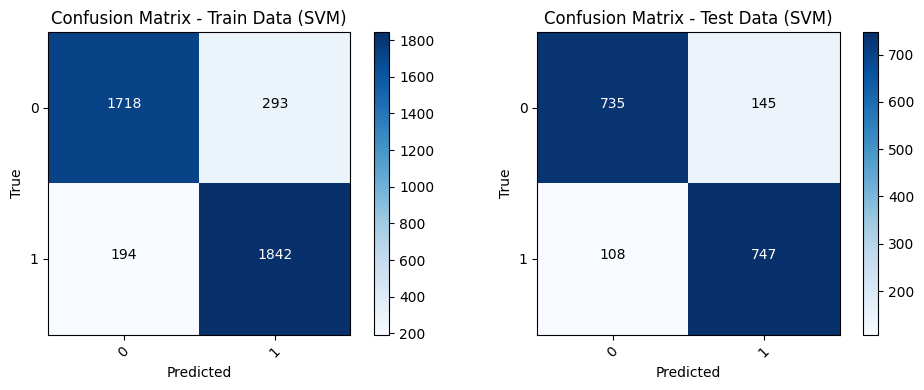

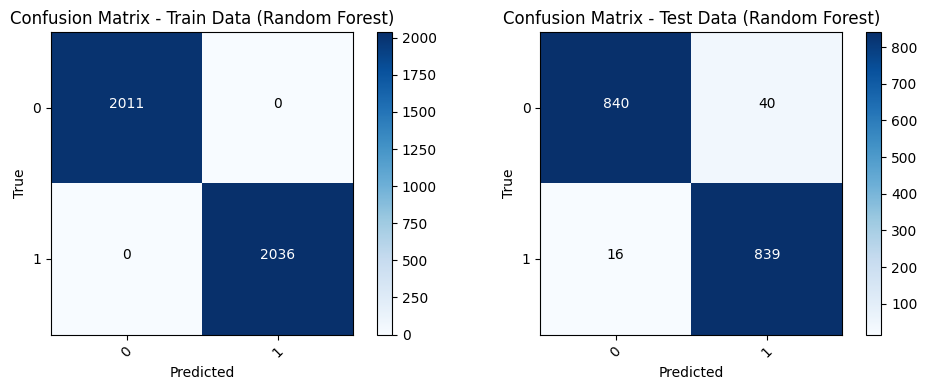

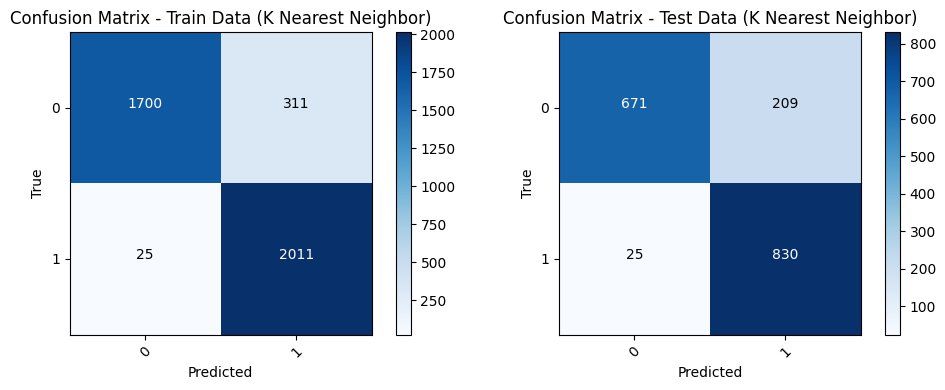

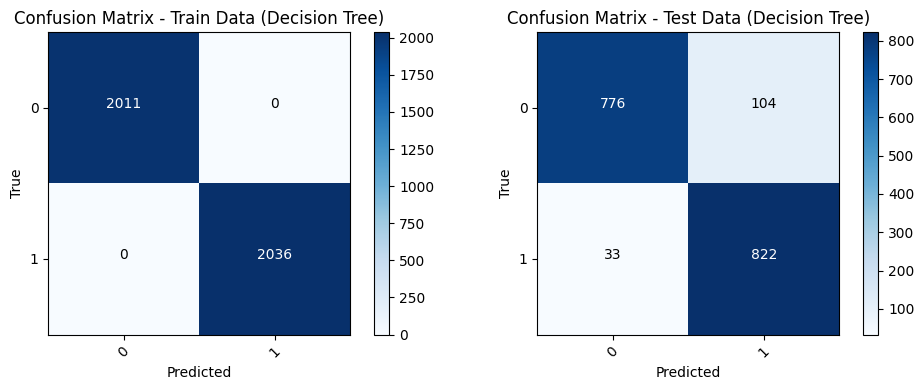

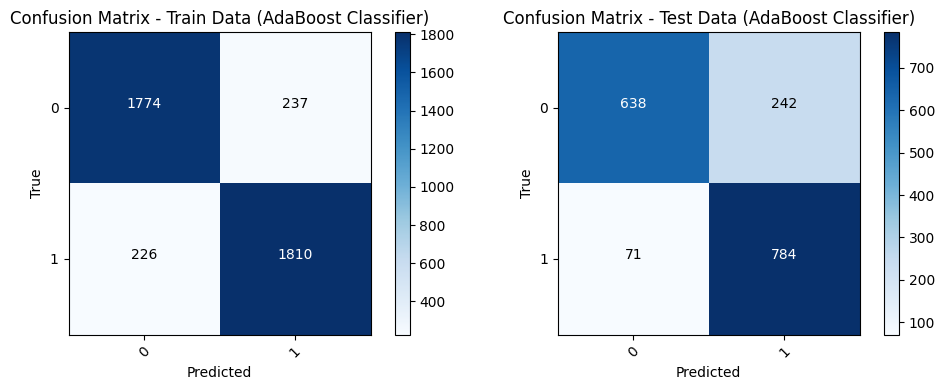

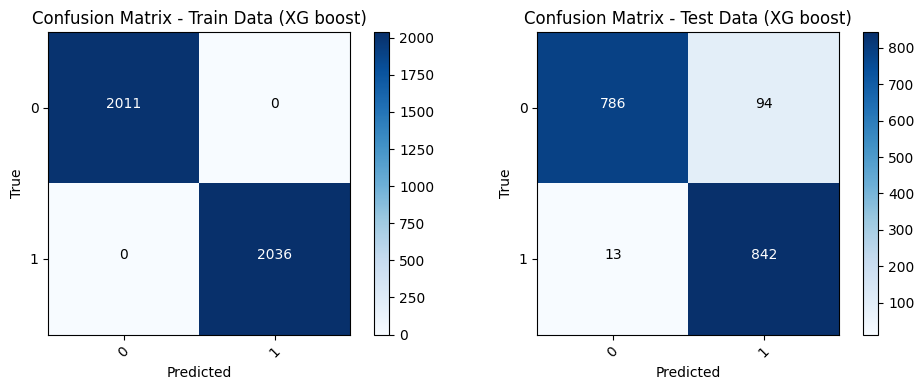

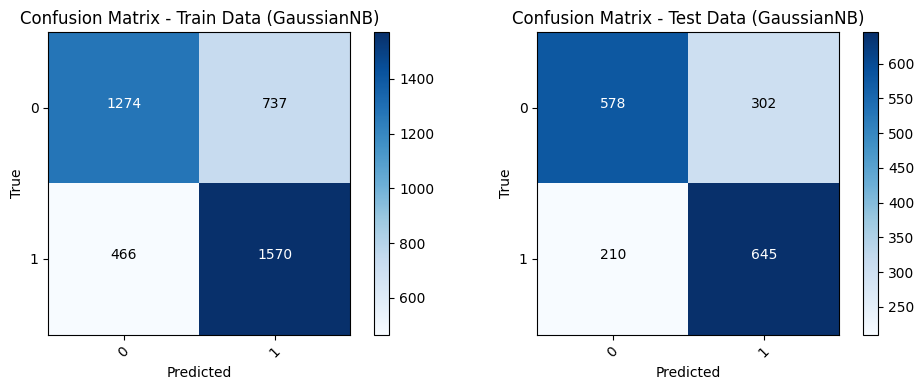

In [14]:


for index, row in Evaluation_df.iterrows():
    model_name = row['Model Name']
    cm_train = row['Confusion Matrix on train data']
    cm_test = row['Confusion Matrix on test data']
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Confusion Matrix - Train Data ({model_name})')
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    tick_marks = np.arange(len(cm_train))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.xticks(rotation=45)
    for i in range(len(cm_train)):
        for j in range(len(cm_train)):
            plt.text(j, i, str(cm_train[i][j]), horizontalalignment="center", color="white" if cm_train[i, j] > (cm_train.max() / 2) else "black")

    plt.subplot(1, 2, 2)
    plt.title(f'Confusion Matrix - Test Data ({model_name})')
    plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    tick_marks = np.arange(len(cm_test))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.xticks(rotation=45)
    for i in range(len(cm_test)):
        for j in range(len(cm_test)):
            plt.text(j, i, str(cm_test[i][j]), horizontalalignment="center", color="white" if cm_test[i, j] > (cm_test.max() / 2) else "black")

    plt.show()


# Ranking models based on evaluation metrics

In [15]:
# Evaluation_df['Average Performance'] = (Evaluation_df[['Accuracy on train data', 'Accuracy on test data', 
#                                  'Precision on train data', 'Precision on test data',
#                                  'Recall on train data', 'Recall on test data',
#                                  'F1-score on train data', 'F1-score on test data']].mean(axis=1))

In [16]:
df_sorted = Evaluation_df.sort_values(by='Accuracy on test data', ascending=False)
print(df_sorted[['Model Name', 'Accuracy on test data']])

            Model Name  Accuracy on test data
2        Random Forest               0.967723
6             XG boost               0.938329
4        Decision Tree               0.921037
3   K Nearest Neighbor               0.865130
1                  SVM               0.854179
5  AdaBoost Classifier               0.819597
0  Logistic Regression               0.776945
7           GaussianNB               0.704899


In [17]:
import plotly.express as px

# Melting the DataFrame to have a tidy format for visualization
df_melted = df_sorted.melt(id_vars='Model Name', value_vars=['Accuracy on train data', 'Accuracy on test data',
                                                             'Precision on train data', 'Precision on test data',
                                                             'Recall on train data', 'Recall on test data',
                                                             'F1-score on train data', 'F1-score on test data'],
                           var_name='Metric', value_name='Score')

# Creating a grouped bar chart
fig = px.bar(df_melted, x='Model Name', y='Score', color='Metric',
             barmode='group', title='Performance Metrics Comparison by Model',
             labels={'Score': 'Score', 'Model Name': 'Model', 'Metric': 'Metric'})

fig.show()


Best performance and accuracy is given by random Forest

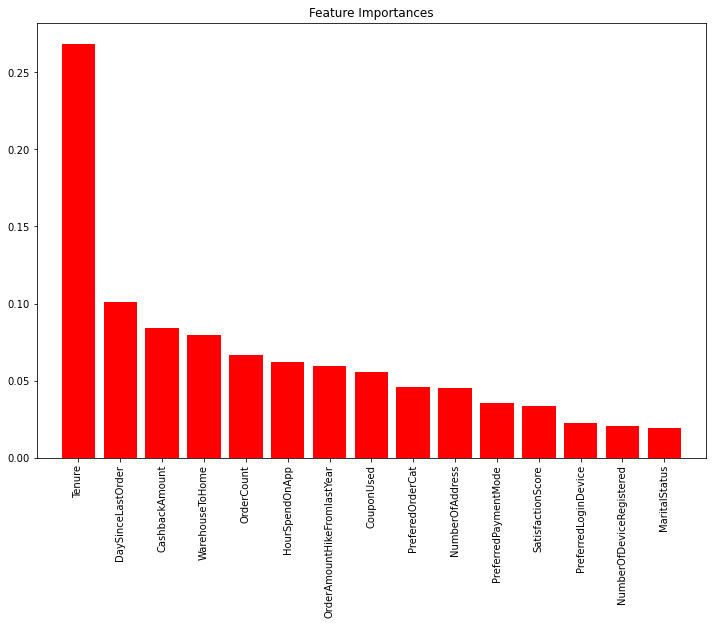

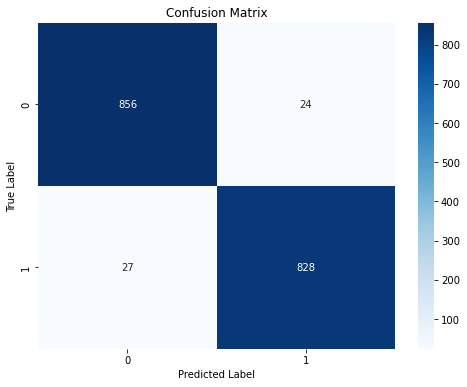

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=15, random_state=42)
Best Score: 0.9671376031985839


In [ ]:
# import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
#plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

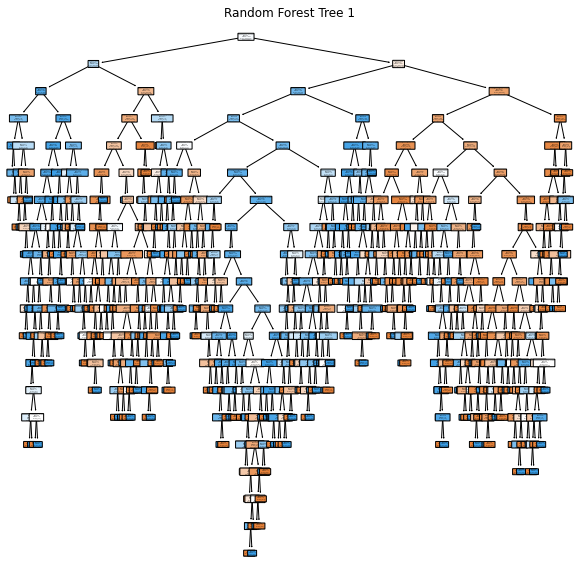

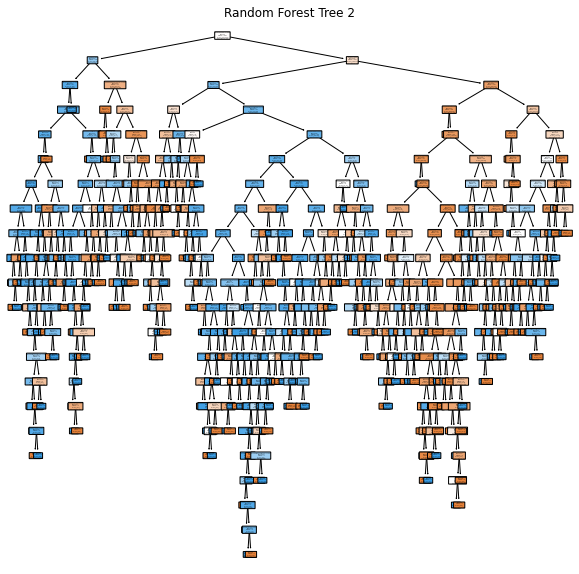

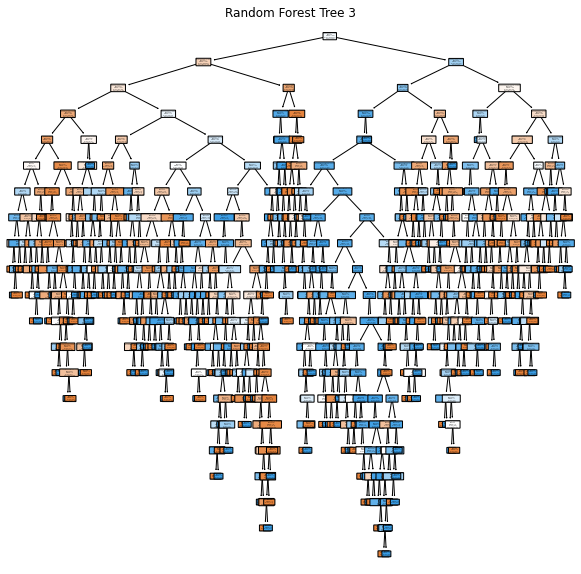

In [ ]:
from sklearn import tree

# Visualizing individual decision trees
for i in range(3):  # Visualize first 3 trees
    plt.figure(figsize=(10, 10))
    tree.plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=['Not Churned', 'Churned'],
                   filled=True, rounded=True)
    plt.title(f"Random Forest Tree {i+1}")
    plt.savefig(f"rf_tree_{i}.png")
    plt.show()


## GRID SEARCH CV With k fold cross validation

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}
param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'xgb__n_estimators': [100, 200, 300, 400],
    'xgb__objective': ['binary:logistic']
}
# Define the parameter grid for AdaBoost
adb_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0] # Learning rate
}

# Initialize models with default parameters
rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()

# Perform grid search for Random Forest
# rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=, scoring='accuracy')
rf_grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_param_grid, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    n_jobs=-1, 
    scoring='roc_auc', 
    verbose=2
)
rf_grid_search.fit(x_train_scaled, y_train)

# Perform grid search for AdaBoost
# adb_grid_search = GridSearchCV(adb_model, adb_param_grid, cv=5, scoring='accuracy')
adb_grid_search = GridSearchCV(
    estimator=adb_model, 
    param_grid=adb_param_grid, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    n_jobs=-1, 
    scoring='roc_auc', 
    verbose=2
)
adb_grid_search.fit(x_train_scaled, y_train)

best_rf_params = rf_grid_search.best_params_
best_adb_params = adb_grid_search.best_params_

rf_model.set_params(**best_rf_params)
adb_model.set_params(**best_adb_params)

ensemble_models = [
    ("Random Forest", rf_model),
    ("AdaBoost", adb_model)
]

# Train ensemble models
for name, model in ensemble_models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest Accuracy: 0.9654178674351584
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       880
           1       0.95      0.98      0.97       855

    accuracy                           0.97      1735
   macro avg       0.97      0.97      0.97      1735
weighted avg       0.97      0.97      0.97      1735

Confusion Matrix:
[[839  41]
 [ 19 836]]

AdaBoost Accuracy: 0.7832853025936599
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       880
           1       0.71      0.94      0.81       855

    accuracy                           0.78      1735
   macro avg       0.81      0.79      0.78      1735
weighted avg       0.82      0.78      0.78      1735

Confusion Matrix:
[[555 325]
 [ 51 804]]



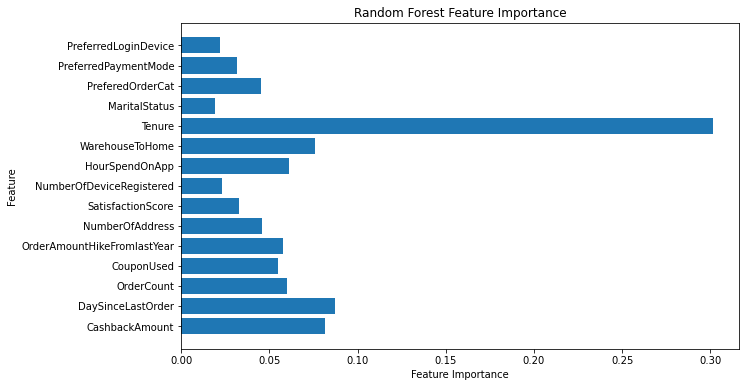

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances for Random Forest and AdaBoost models
rf_feature_importances = rf_model.feature_importances_
adb_feature_importances = adb_model.feature_importances_

feature_names = list(proc_data.columns) 

num_features = min(len(feature_names), len(rf_feature_importances))

plt.figure(figsize=(10, 6))
plt.barh(feature_names[:num_features], rf_feature_importances[:num_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis() 
plt.show()



DEEP NEURAL NETWORK

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5471 - loss: 0.6980
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7214 - loss: 0.5727
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7739 - loss: 0.4922
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7956 - loss: 0.4579
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7989 - loss: 0.4440
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8030 - loss: 0.4283
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8120 - loss: 0.4206
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8122 - loss: 0.4257
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8201 - loss: 0.3978
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8248 - loss: 0.3863


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8284 - loss: 0.3886
Test Loss: 0.4181
Test Accuracy: 0.8107
